In [43]:
import urllib.request
import bs4 as bs
import nltk
import spacy
import matplotlib.pyplot as plt

from IPython.core.display import HTML
from spacy.matcher import PhraseMatcher
from spacy import displacy
from spacy.lang.pt.stop_words import STOP_WORDS
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

## Load Texts

In [5]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [6]:
dados = dados.read()

In [10]:
dados_html = bs.BeautifulSoup(dados, 'lxml')

In [12]:
paragraphs = dados_html.find_all('p')

In [13]:
paragraphs[2].text

'O principal objetivo dos sistemas de IA, é executar funções que, caso um ser humano fosse executar, seriam consideradas inteligentes. É um conceito amplo, e que recebe tantas definições quanto damos significados diferentes à palavra inteligência.[4] Podemos pensar em algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos de forma que no futuro agirá de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[4]\n'

In [14]:
content = ''

for p in paragraphs:
  content += p.text

In [16]:
content = content.lower()

## Search Texts

In [17]:
pln = spacy.load('pt_core_news_sm')
pln

In [19]:
string = 'turing'
token_search = pln(string)

In [21]:
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_search)

In [23]:
doc = pln(content)
matches = matcher(doc)
matches

[(8661325627334373315, 3030, 3031),
 (8661325627334373315, 3040, 3041),
 (8661325627334373315, 3196, 3197),
 (8661325627334373315, 3201, 3202),
 (8661325627334373315, 3207, 3208),
 (8661325627334373315, 3270, 3271),
 (8661325627334373315, 3897, 3898),
 (8661325627334373315, 5162, 5163),
 (8661325627334373315, 8613, 8614),
 (8661325627334373315, 8748, 8749),
 (8661325627334373315, 8843, 8844),
 (8661325627334373315, 8960, 8961)]

In [25]:
doc[3030:3031], doc[3030-5:3031+5]

(turing, uma contribuição prática de alan turing foi o que se chamou)

In [26]:
doc[8960:8961], doc[8960-5:8961+5]

(turing, asiático a vencer o prêmio turing. entre suas contribuições para)

In [29]:
text = ''
num_words = 50
doc = pln(content)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()} </h1>'))
display(HTML(f"""<p><strong>Results Found:</strong>{len(matches)}</p>"""))

for i in matches:
  start = i[1] - num_words
  if start < 0:
    start = 0
  text += str(doc[start:i[2] + num_words]).replace(string, f"<mark><strong>{string}</strong></mark>")
  text += "<br/><br/>"
display(HTML(f"""...{text}..."""))

## Extração de entidades nomeadas

* NER (Named-Entity Recognition)
* Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numericos)
* Usado em chatbots para saber o assunto falado

In [33]:
displacy.render(doc, style='ent')

## Nuvem de palavras e stop words

In [35]:
print(STOP_WORDS)

{'sétimo', 'nuns', 'irá', 'porquanto', 'vezes', 'treze', 'questão', 'maiorias', 'um', 'fui', 'dizer', 'grandes', 'fim', 'isso', 'mais', 'todas', 'quarta', 'pelos', 'ainda', 'minhas', 'próprio', 'ter', 'estiveram', 'cento', 'foste', 'dois', 'duas', 'ponto', 'o', 'sistema', 'exemplo', 'alguns', 'essas', 'temos', 'dos', 'eles', 'se', 'fazeis', 'ou', 'conhecida', 'estivestes', 'só', 'nossa', 'estava', 'sou', 'tentei', 'iniciar', 'nessa', 'tuas', 'poder', 'além', 'bastante', 'nenhuma', 'já', 'nesta', 'tentar', 'coisa', 'devem', 'novas', 'para', 'sempre', 'dez', 'sabe', 'desde', 'saber', 'ali', 'maior', 'antes', 'dessa', 'nossos', 'possível', 'vinda', 'ligado', 'este', 'vais', 'acerca', 'elas', 'usa', 'esse', 'bom', 'nível', 'umas', 'quais', 'parece', 'uma', 'teu', 'aos', 'oitavo', 'geral', 'atrás', 'então', 'à', 'seu', 'vez', 'ser', 'sétima', 'nos', 'tanta', 'meio', 'poderá', 'neste', 'estas', 'estive', 'quarto', 'sexto', 'faz', 'adeus', 'dezanove', 'local', 'porque', 'deverá', 'querem', 'p

In [36]:
len(STOP_WORDS)

416

In [37]:
doc = pln(content)
list_token = []

for token in doc:
  list_token.append(token.text)

In [38]:
len(list_token)

9881

In [39]:
no_stop = []

for word in list_token:
  if pln.vocab[word].is_stop == False:
    no_stop.append(word)

In [41]:
len(no_stop)

5777

In [47]:
color_map = ListedColormap(['orange','green','magenta','red', 'blue'])

In [48]:
cloud = WordCloud(background_color='white', max_words= 100, colormap= color_map)

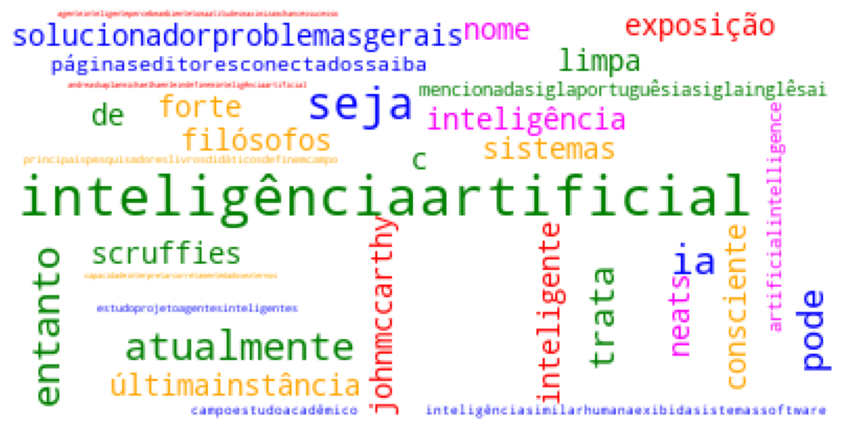

In [49]:
cloud = cloud.generate(''.join(no_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()